# McDonald Valley Problem

Note: this one is not correct yet.  I've been trying to get a MODFLOW 6 version of the original 200 by 125 grid, but I haven't been able to reproduce it yet.  The MODFLOW-2005 version with BCF does seem to be correct, though.  So that information can be used to update this notebook.

* Layer 0: upper aquifer (lake)
* Layer 1: upper aquifer
* Layer 2: confining bed
* Layer 3: lower aquifer A
* Layer 4: lower aquifer B

In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import flopy

flopy is installed in /Users/langevin/langevin/dev/flopy3fork.git/flopy


In [2]:
datapth = './data'
nlay, nrow, ncol = 5, 200, 125

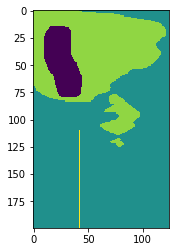

In [3]:
# read ibound layer 0
ibound0 = np.empty((nrow * ncol), dtype=np.int)
fname = os.path.join(datapth, 'ibound1.dat')
f = open(fname)
ibound0 = flopy.utils.read1d(f, ibound0).reshape((nrow, ncol))
f.close()
plt.imshow(ibound0)

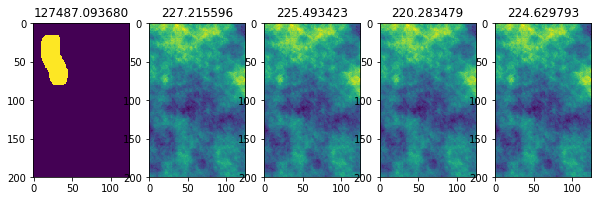

In [4]:
# read hk layer 0
hk = []
fig, axes = plt.subplots(ncols=5, figsize=(10, 10))
fig.figsize = (10, 10)
for k in range(nlay):
    hk_ = np.empty((nrow * ncol), dtype=np.float)
    fname = os.path.join(datapth, 'hk{}.dat'.format(k + 1))
    f = open(fname)
    hk_ = flopy.utils.read1d(f, hk_).reshape((nrow, ncol))
    f.close()
    ax = axes[k]
    cb = ax.imshow(hk_)
    hk.append(hk_)
    ax.set_title('{:2f}'.format(hk_.mean()))
    #plt.colorbar(cb)

In [5]:
delr = delc = 100.
laycon = [1, 0, 0, 0, 0]
bot0 = -5

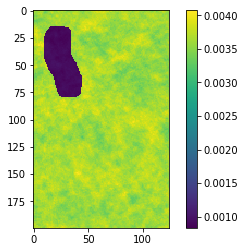

In [6]:
# read rech layer 0 (the array is multipled by 0.00365)
rech = np.empty((nrow * ncol), dtype=np.float)
fname = os.path.join(datapth, 'rech.dat')
f = open(fname)
rech = flopy.utils.read1d(f, rech).reshape((nrow, ncol))
rech = rech * 0.00365
f.close()
plt.imshow(rech)
plt.colorbar()

Text(0.5, 1.0, '32691.780821917808')

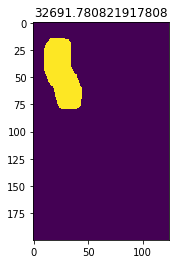

In [7]:
# lake budget
precip = 36 # inches per year
evap = 27 # inches per year
lake_area = 1.625e7 # feet squared

# rech_lake = np.where(ibound0<0, rech, 0)
rech_lake = np.where(ibound0<0, (precip - evap) / 12. / 365., 0)
plt.imshow(rech_lake)
plt.title('{}'.format(rech_lake.sum() * 100 * 100))

Text(0.5, 1.0, '851640.0423499999')

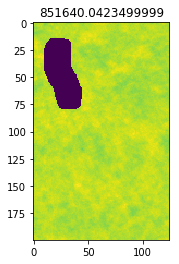

In [8]:
rech_aquifer = np.where(ibound0>0, rech, 0)
plt.imshow(rech_aquifer)
plt.title('{}'.format(rech_aquifer.sum() * 100 * 100))

Text(0.5, 1.0, '1.56')

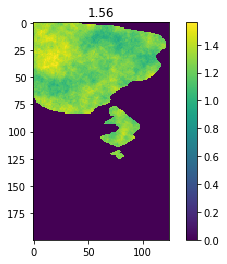

In [9]:
# confining unit thickness
thick2 = np.empty((nrow * ncol), dtype=np.float)
fname = os.path.join(datapth, 'thick3.dat')
f = open(fname)
thick2 = flopy.utils.read1d(f, thick2).reshape((nrow, ncol))
f.close()
plt.imshow(thick2)
plt.colorbar()
plt.title('{}'.format(thick2.max()))

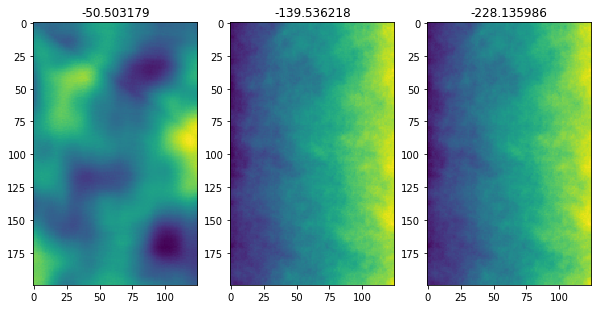

In [10]:
# read bot 2-4
bot = []
fig, axes = plt.subplots(ncols=3, figsize=(10, 10))
fig.figsize = (10, 10)
for k in range(2, nlay):
    bot_ = np.empty((nrow * ncol), dtype=np.float)
    fname = os.path.join(datapth, 'bot{}.dat'.format(k + 1))
    f = open(fname)
    bot_ = flopy.utils.read1d(f, bot_).reshape((nrow, ncol))
    f.close()
    ax = axes[k - 2]
    cb = ax.imshow(bot_)
    bot.append(bot_)
    ax.set_title('{:2f}'.format(bot_.mean()))

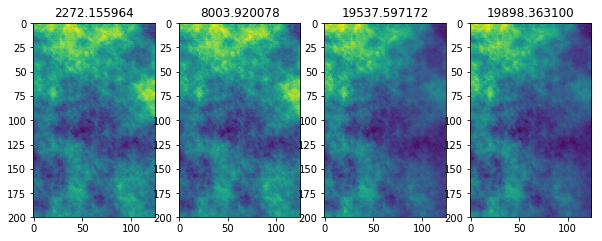

In [11]:
# read tran 1-4
tran = []
fig, axes = plt.subplots(ncols=4, figsize=(10, 10))
fig.figsize = (10, 10)
for k in range(1, nlay):
    tran_ = np.empty((nrow * ncol), dtype=np.float)
    fname = os.path.join(datapth, 'tran{}.dat'.format(k + 1))
    f = open(fname)
    tran_ = flopy.utils.read1d(f, tran_).reshape((nrow, ncol))
    f.close()
    ax = axes[k - 1]
    cb = ax.imshow(tran_)
    tran.append(tran_)
    ax.set_title('{:2f}'.format(tran_.mean()))

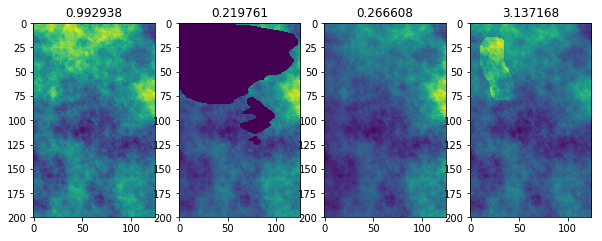

In [12]:
# read vcont 1-4
vcont = []
fig, axes = plt.subplots(ncols=4, figsize=(10, 10))
fig.figsize = (10, 10)
for k in range(nlay - 1):
    vcont_ = np.empty((nrow * ncol), dtype=np.float)
    fname = os.path.join(datapth, 'vcont{}.dat'.format(k + 1))
    f = open(fname)
    vcont_ = flopy.utils.read1d(f, vcont_).reshape((nrow, ncol))
    f.close()
    ax = axes[k - 1]
    cb = ax.imshow(vcont_)
    vcont.append(vcont_)
    ax.set_title('{:2f}'.format(vcont_.mean()))

Text(0.5, 1.0, '0.974493')

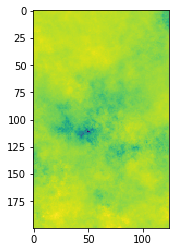

In [13]:
a = tran[-2] / tran[-1]
plt.imshow(a)
ax.set_title('{:2f}'.format(a.mean()))

(0, 20000)

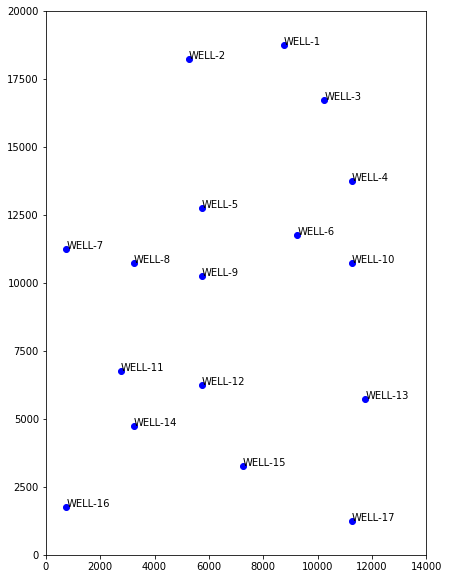

In [14]:
well_info = [
    [1, 3, 18, 12.05],
    [2, 4, 11, 11.63],
    [3, 7, 21, 12.15],
    [4, 13, 23, 11.44],
    [5, 15, 12, 10.86],
    [6, 17, 19, 10.80],
    [7, 18, 2, 9.16],
    [8, 19, 7, 8.82],
    [9, 20, 12, 8.86],
    [10, 19, 23, 10.65],
    [11, 27, 6, 4.26],
    [12, 28, 12, 4.19],
    [13, 29, 24, 7.57],
    [14, 31, 7, 2.70],
    [15, 34, 15, 4.59],
    [16, 37, 2, 2.76],
    [17, 38, 23, 6.23]]
well_info = [('WELL-{}'.format(id), 
              col * 500. - 250., 
              40 * 500 - row * 500 + 250,
              stage) for id, row, col, stage in well_info]
dt = np.dtype([('name', 'S15'), ('x', float), ('y', float), ('stage', float)])
well_info = np.array(well_info, dtype=dt)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1, aspect='equal')
ax.plot(well_info['x'], well_info['y'], 'bo')
for name, x, y, stage in well_info:
    ax.text(x, y, name.decode())
ax.set_xlim(0, 28 * 500)
ax.set_ylim(0, 40 * 500)

In [15]:
ws = './mf6'
nlay, nrow, ncol = 5, 200, 125
sim = flopy.mf6.MFSimulation(sim_ws=ws, exe_name='mf6')
tdis = flopy.mf6.ModflowTdis(sim)
gwf = flopy.mf6.ModflowGwf(sim)
ims = flopy.mf6.ModflowIms(sim, print_option='summary',
                           outer_maximum=50, inner_maximum=500,
                           relaxation_factor=0.97)
idomain = [1, 1, np.where(thick2==0, -1, 1), 1, 1]
dis = flopy.mf6.ModflowGwfdis(gwf, nrow=nrow, ncol=ncol, nlay=nlay,
                              delr=100., delc=100.,
                              top=100., 
                              botm=[-5., -50., -50. - thick2, bot[-2], bot[-1]],
                              idomain=idomain)
ic = flopy.mf6.ModflowGwfic(gwf, strt=11.)
vani = .01
kv = [hk[0] * vani, hk[1] * vani, 0.001, hk[3] * vani, hk[4] * vani]
npf = flopy.mf6.ModflowGwfnpf(gwf, k=hk, k33=kv)
ii, jj = np.where(ibound0 < 0)
#chd = flopy.mf6.ModflowGwfchd(gwf, stress_period_data=[[(0, i, j), 11.] for i, j in zip(ii, jj)])

nriv = 200 - 110
rivstage = np.linspace(1.79, 0.01, nriv)
rbot = np.linspace(-0.210, -1.99, nriv)
spd = []
for iriv in range(nriv):
    spd.append([(0, iriv + 110, 42), rivstage[iriv], 80000, rbot[iriv]])

riv = flopy.mf6.ModflowGwfriv(gwf, stress_period_data=spd, pname='STRAIGHTRIVER')
rcha_lake = flopy.mf6.ModflowGwfrcha(gwf, recharge=rech_lake, pname='LAKE-RECH', 
                                     filename='model.rch1')
rcha_aquifer = flopy.mf6.ModflowGwfrcha(gwf, recharge=rech_aquifer, pname='AQUIFER-RECH', 
                                        filename='model.rch2')
oc = flopy.mf6.ModflowGwfoc(gwf, head_filerecord='model.hds', 
                            saverecord={0: [('head', 'all')]})
continuous_obs = [[name.decode(), 'head', (0, *gwf.modelgrid.intersect(x, y))] for name, x, y, stage in well_info]
continuous_obs = {'model.obs.csv': continuous_obs}
obs = flopy.mf6.ModflowUtlobs(gwf, continuous=continuous_obs, )
sim.write_simulation()
sim.run_simulation()

writing simulation...
  writing simulation name file...
  writing simulation tdis package...
  writing ims package ims_-1...
  writing model model...
    writing model name file...
    writing package dis...
    writing package ic...
    writing package npf...
    writing package straightriver...
INFORMATION: maxbound in ('gwf6', 'riv', 'dimensions') changed to 90 based on size of stress_period_data
    writing package lake-rech...
    writing package aquifer-rech...
    writing package oc...
    writing package obs_0...
FloPy is using the following  executable to run the model: /Users/langevin/langevin/bin/mac/mf6
                                   MODFLOW 6
                U.S. GEOLOGICAL SURVEY MODULAR HYDROLOGIC MODEL
                            VERSION 6.0.4 03/13/2019

  MODFLOW 6 compiled Mar 14 2019 09:20:00 with GFORTRAN compiler (ver. 8.2.0)

This software has been approved for release by the U.S. Geological 
Survey (USGS). Although the software has been subjected to rigorous

(True, [])

In [16]:
#!cat ./model/model.lst

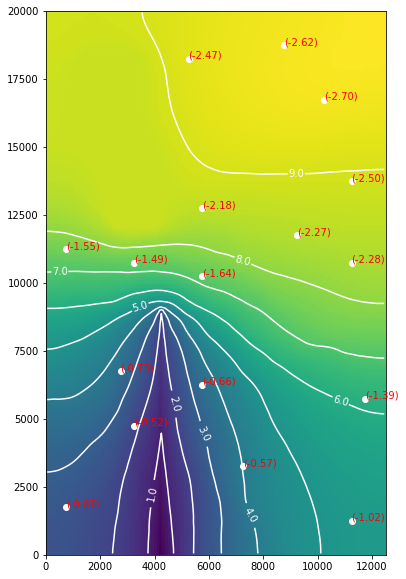

In [17]:
hdobj = flopy.utils.HeadFile(os.path.join(ws, 'model.hds'), precision='double')
head = hdobj.get_data()
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1, aspect='equal')
pmv = flopy.plot.PlotMapView(gwf)
pmv.plot_array(head)
cs = pmv.contour_array(head, levels=np.arange(20), colors='white')
ax.clabel(cs, inline=1, fontsize=10, fmt='%1.1f')

# read obs
fname = os.path.join(ws, 'model.obs.csv')
obs_csv = np.genfromtxt(fname, delimiter=',', names=True)
residuals = []
for id, (name, tp, cellid, id2) in enumerate(continuous_obs['model.obs.csv']):
    residuals.append(head[0, cellid[1], cellid[2]] - well_info['stage'][id])

ax.plot(well_info['x'], well_info['y'], 'wo')
for id, (name, x, y, stage) in enumerate(well_info):
    r = residuals[id]
    color = 'red'
    if r > 0:
        color = 'blue'
    ax.text(x, y, '({:.2f})'.format(r), color=color)